Dataset Overview:
    Student_ID  Study_Hours  Attendance (%)  Pass (1=Yes, 0=No)
0           1            7              94                   0
1           2           20              41                   0
2           3           15              88                   1
3           4           11              67                   0
4           5            8              71                   0

Checking for missing values:
 Student_ID            0
Study_Hours           0
Attendance (%)        0
Pass (1=Yes, 0=No)    0
dtype: int64


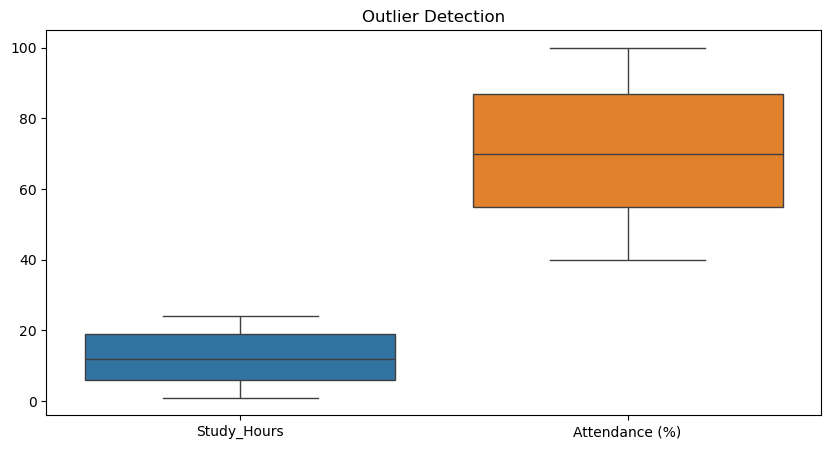

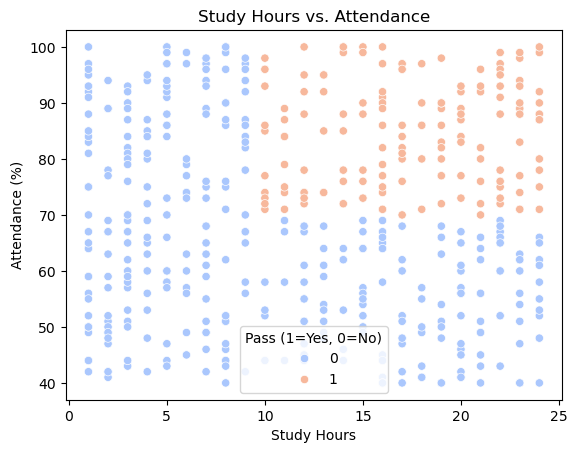


Model Accuracy: 0.86

Confusion Matrix:
 [[55  5]
 [ 9 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.86      0.78      0.82        40

    accuracy                           0.86       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100


Feature Importance:
           Feature  Coefficient
0     Study_Hours     0.351719
1  Attendance (%)     0.164621


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset 
df = pd.read_csv('student_dataset.csv')

# Step 2: Data Exploration
print("Dataset Overview:\n", df.head())
print("\nChecking for missing values:\n", df.isnull().sum())

# Detecting Outliers using Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Study_Hours', 'Attendance (%)']])
plt.title("Outlier Detection")
plt.show()

# Visualizing Data
sns.scatterplot(x=df['Study_Hours'], y=df['Attendance (%)'], hue=df['Pass (1=Yes, 0=No)'], palette='coolwarm')
plt.xlabel('Study Hours')
plt.ylabel('Attendance (%)')
plt.title('Study Hours vs. Attendance')
plt.show()

# Step 3: Model Training
X = df[['Study_Hours', 'Attendance (%)']]
y = df['Pass (1=Yes, 0=No)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# Feature Importance Analysis
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("\nFeature Importance:\n", coefficients)
